<a href="https://colab.research.google.com/github/azwarerizal/python_pandas/blob/main/Python_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import library and data


In [ ]:
import pandas as pd
import io
from google.colab import files

uploaded = files.upload()
df_ecomm = pd.read_csv(io.BytesIO(uploaded['ecommerce_event.csv']))

Saving ecommerce_event.csv to ecommerce_event.csv


In [ ]:
uploaded2 = files.upload()
df_user = pd.read_csv(io.BytesIO(uploaded2['user_profile.csv']))

Saving user_profile.csv to user_profile.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Data Summary


In [ ]:
df_ecomm.describe()

### Sort data using python

In [ ]:
df_ecomm.head()

In [ ]:
df_ecomm.sort_values('price', ascending = False)

In [ ]:
df_ecomm.columns

In [ ]:
df_ecomm_simplified = df_ecommdf_ecomm_simplified = df_ecomm[['product_id', 'category', 'subcategory',
       'brand', 'price', 'user_id']]
      


In [ ]:
df_ecomm_simplified2 = df_ecomm_simplified.drop(columns = ['brand', 'price'] )


In [ ]:
df_ecomm_simplified2.head()


In [ ]:
df_ecomm.loc[ df_ecomm['price'] >500 ].head()

In [ ]:
df_ecomm.loc[ df_ecomm['price'] >500,['brand', 'price'] ].sort_values('price', ascending = False)

In [ ]:
df_ecomm.loc[ (df_ecomm['price'] >500) & (df_ecomm['brand'] == 'acer') ,['brand', 'price'] ].sort_values('price', ascending = False)

In [ ]:
df_ecomm.loc[ (df_ecomm['price'] >500) & (df_ecomm['brand'].isin(['acer','apple','samsung'])) ,['brand', 'price'] ].sort_values(['brand','price'], ascending = [True,False]).head(4000)

### Grouping

In [ ]:
df_ecomm[['brand','price','user_id']].groupby('brand', as_index=False).sum()

In [ ]:
df_ecomm[['brand','price','user_id']].groupby('brand', as_index=False).agg({'price': ['mean','min','sum'],
                                                                                  'user_id':['count','unique'] })

brand       price                    user_id  \
                     mean     min        sum   count   
0    aardwolf    8.980000    8.98       8.98       1   
1        acer  619.093077   12.07  185108.83     299   
2        acme   48.392500   28.06     193.57       4   
3       adata   62.690000   62.69      62.69       1   
4      adidas  106.097083   69.50    2546.33      24   
..        ...         ...     ...        ...     ...   
732    zlatek   42.965000   11.56     429.65      10   
733      zoom  167.310000  167.31     167.31       1   
734     zotac  413.830000  413.83     413.83       1   
735       zte   80.690000   66.90     887.59      11   
736      zubr   94.920000   94.92      94.92       1   

                                                        
                                                unique  
0                                          [512869102]  
1    [514752602, 556641072, 515828195, 535133560, 5...  
2         [548884300, 542696619, 514066699, 555023580]  
3                                          [560572523]  
4    [515693447, 514709354, 513872508, 515426700, 5...  
..                                                 ...  
732  [541716831, 540169802, 554982329, 564119134, 5...  
733                                        [543090507]  
734                                        [515058180]  
735  [515265284, 531339256, 534523254, 562460569, 5...  
736                                        [559358186]  

[737 rows x 6 columns]

In [ ]:
df_ecomm_group.columns = ['brand','']

### Join

In [ ]:
df_ecomm.head()

In [ ]:
df_user.head()

In [ ]:
df_ecomm_user = pd.merge(df_ecomm, df_user, how='inner',on='user_id')

NameError: ignored

In [ ]:
df_ecomm_user[['age', 'gender']]

In [ ]:
df_ecomm_user.head()

### Exercise 1
### Create new table/dataframe from ecommerce_event, with new criteria:
1.Pick only columns: event_date, brand, price 
2.Filter date before 10 oct 2019,and brand are: samsung, hp, apple, xiaomi
3.Show min, max, and average price in each brand


In [ ]:
df_ecomm[['event_date', 'brand', 'price']].loc[(df_ecomm['event_date']<= '2019-10-10') & 
                                               (df_ecomm['brand'].isin(['samsung', 'hp', 'apple', 'xiaomi']))
                                               ].groupby ('brand', as_index=False).agg({'price': ['min','max','mean']}).sort_values('brand')

brand  price                     
              min      max        mean
0    apple  33.42  2522.33  854.117813
1       hp  38.35  2553.04  582.277662
2  samsung   6.92  2573.79  357.700853
3   xiaomi   5.79  1250.74  219.498831

### Exercise 2
Show top 5 ages which has most session from event_type = view and male gender

In [ ]:
df_merge = pd.merge(df_ecomm, df_user, how = 'inner', on= 'user_id')
df_merge_session = df_merge.loc[(df_merge['event_type'] == 'view') & (df_merge['gender'] == 'male')
].groupby('age', as_index = False).agg(num_session = ('user_session', 'nunique'))

In [ ]:
df_merge2 = df_ecomm_user.loc[(df_ecomm_user['event_type'] == 'view') & (df_ecomm_user['gender'] == 'Male') 
                             ].groupby('age', as_index=False).agg({'user_session': 'nunique', 'event_type': 'unique', 'gender': 'unique'}).sort_values('age')

df_merge2.columns = ['age','event_type', 'user_session', 'gender']


In [ ]:
df_merge2.head(10)

In [ ]:
df_ecomm_user[['age','event_type', 'user_session', 'gender']].loc[(df_ecomm_user['event_type'] == 'view') & (df_ecomm_user['gender'] == 'Male') 
                             ].groupby('age', as_index=False).agg({'user_session': 'nunique', 'event_type': 'unique', 'gender': 'unique'}
                                                                  ).sort_values('user_session', ascending=False).head(5)

NameError: ignored

In [ ]:
df_ecomm_user[['age','event_type', 'user_session', 'gender', 'price']].loc[(df_ecomm_user['event_type'] == 'view') & (df_ecomm_user['gender'] == 'Male') 
                             ].groupby('age', as_index=False).agg(most_session = ('user_session', 'nunique')).sort_values('most_session', ascending=False).head(5)

,age,most_session
22,40,199
16,34,189
36,54,188
1,19,188
20,38,186


### Data Viz

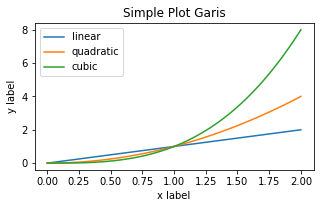

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
x = np.linspace(0, 2, 100)  # Sample data.

fig, ax = plt.subplots(figsize=(5, 2.7)) #declare the figure and axes
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot Garis")  # Add a title to the axes.
ax.legend();  # Add a legend.


In [ ]:
df_ecomm_most = df_ecomm_user.loc[(df_ecomm_user['event_type'] == 'view') & (df_ecomm_user['gender'] == 'Male') 
                             ].groupby('age', as_index=False).agg(most = ('user_session', 'nunique')).sort_values('most', ascending=False)



NameError: ignored

Text(0.5, 1.0, 'Revenue per Category')

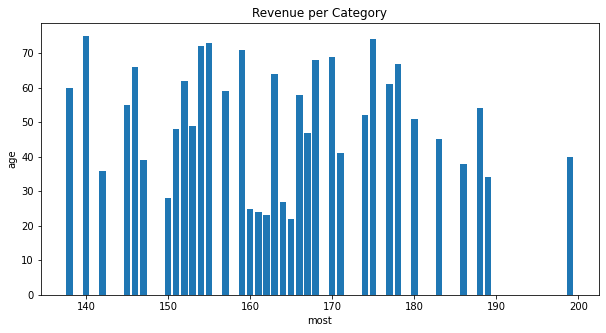

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.bar(df_ecomm_most['most'], df_ecomm_most['age'])  

ax.set_xlabel('most')  
ax.set_ylabel('age')  
ax.set_title("Revenue per Category") 
